
Processing label type: random_labels
nqubits list: [8]
Training data list: [5, 8, 10, 14, 20]
random_labels_nqubits_8_training_data_5: train_error = 0.0, test_error = 0.73, gap = 0.73
random_labels_nqubits_8_training_data_8: train_error = 0.0, test_error = 0.748, gap = 0.748
random_labels_nqubits_8_training_data_10: train_error = 0.0, test_error = 0.735, gap = 0.735
random_labels_nqubits_8_training_data_14: train_error = 0.0714285714285714, test_error = 0.739, gap = 0.6675714285714286
random_labels_nqubits_8_training_data_20: train_error = 0.19999999999999996, test_error = 0.76, gap = 0.56

Processing label type: random_states
nqubits list: [8]
Training data list: [5, 8, 10, 14, 20]
random_states_nqubits_8_training_data_5: train_error = 0.0, test_error = 0.6279999999999999, gap = 0.6279999999999999
random_states_nqubits_8_training_data_8: train_error = 0.0, test_error = 0.611, gap = 0.611
random_states_nqubits_8_training_data_10: train_error = 0.0, test_error = 0.649, gap = 0.649
rand

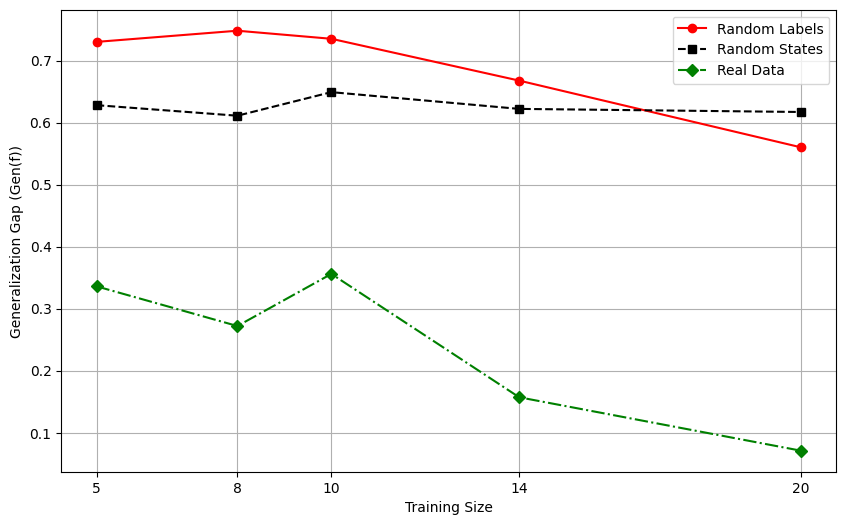

In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# Define the parent directory containing subfolders for different label types
PARENT_DIRECTORY = r"C:\Users\deols\OneDrive\Documents\GitHub\qml_rethinking_gen"
LABEL_TYPES = ["random_labels", "random_states", "real_labels"]
PLOT_LABELS = ["Random Labels", "Random States", "Real Data"]

# Regular expressions to extract parameters from filenames
NQUBITS_PATTERN = re.compile(r"nqubits_(\d+)")
TRAINING_DATA_PATTERN = re.compile(r"training_data_(\d+)")

# Define colors, markers, and linestyles for plotting
PLOT_STYLES = {
    "colors": ['red', 'black', 'g', 'm', 'y', 'k'],
    "markers": ['o', 's', 'D', '^', 'v', 'p', '*', 'x'],
    "linestyles": ['-', '--', '-.', ':']
}

# Initialize the plot
plt.figure(figsize=(10, 6))

for index, label_type in enumerate(LABEL_TYPES):
    folder_path = os.path.join(PARENT_DIRECTORY, label_type, "qml_error_save")
    
    if not os.path.exists(folder_path):
        print(f"Warning: {folder_path} does not exist. Skipping.")
        continue
    
    print(f"\nProcessing label type: {label_type}")
    
    # Extract unique nqubits and training_data values
    nqubits, training_data = set(), set()
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            if (match := NQUBITS_PATTERN.search(filename)):
                nqubits.add(int(match.group(1)))
            if (match := TRAINING_DATA_PATTERN.search(filename)):
                training_data.add(int(match.group(1)))
    
    # Sort values and filter nqubits (keeping only 8)
    training_data_list = sorted(training_data)
    nqubits_list = [8] if 8 in nqubits else []
    
    print(f"nqubits list: {nqubits_list}")
    print(f"Training data list: {training_data_list}")
    
    # Process data and plot
    for nqubit in nqubits_list:
        training_sizes, gaps = [], []
        
        for training_size in training_data_list:
            filename_base = f"{label_type}_nqubits_{nqubit}_training_data_{training_size}"
            train_error_path = os.path.join(folder_path, f"{filename_base}_train_error.txt")
            test_error_path = os.path.join(folder_path, f"{filename_base}_test_error.txt")
            
            try:
                train_error = np.loadtxt(train_error_path)
                test_error = np.loadtxt(test_error_path)
                gap = test_error - train_error
                
                training_sizes.append(training_size)
                gaps.append(gap)
                
                print(f"{filename_base}: train_error = {train_error}, test_error = {test_error}, gap = {gap}")
            except Exception as e:
                print(f"Error loading files for {filename_base}: {e}")
                continue
        
        if training_sizes and gaps:
            plt.plot(training_sizes, gaps, label=PLOT_LABELS[index],
                     marker=PLOT_STYLES['markers'][index],
                     color=PLOT_STYLES['colors'][index],
                     linestyle=PLOT_STYLES['linestyles'][index])

# Configure and display the plot
plt.xlabel('Training Size')
plt.ylabel('Generalization Gap (Gen(f))')
plt.xticks(training_data_list)
plt.legend()
plt.grid(True)
plt.show()
